# Your Name Here: Daniel Rodriguez

# A4 Unsupervised Learning algorithms (Total 75 points)

## 1. Feature Preprocessing (Total 5 points)

### 1.1 Import numpy, matplotlib, pandas and seaborn (1pt)

In [1]:
# TODO
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 1.2 Load the dataset from given *.csv file using *pandas* (1pt)

In [2]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO
file_name = '/content/drive/MyDrive/CAP_4611/Assignment4/Wine_Quality_Data.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    # TODO
    df = pd.read_csv(file_name)
# TODO
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 1.3 We want to use only the numeric features. So drop the 'color' column from the dataframe. (1pt)

In [3]:
# TODO
df = df.drop('color',axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1.4 Scale the features using Scikitlearn's StandardScaler library (2pt)

In [4]:
# TODO
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[ 0.14247327  2.18883292 -2.19283252 ...  0.19309677 -0.91546416
  -0.93722961]
 [ 0.45103572  3.28223494 -2.19283252 ...  0.99957862 -0.58006813
  -0.93722961]
 [ 0.45103572  2.55330026 -1.91755268 ...  0.79795816 -0.58006813
  -0.93722961]
 ...
 [-0.55179227 -0.6054167  -0.88525328 ... -0.47897144 -0.91546416
   0.20799905]
 [-1.32319841 -0.30169391 -0.12823371 ... -1.016626    1.9354021
   1.35322771]
 [-0.93749534 -0.78765037  0.42232597 ... -1.41986693  1.09691202
   0.20799905]]


## 2. KMeans Clustering with PCA selection (Total 25 points)

### 2.1 Import PCA from scikitlearn's decomposition library.  (3pt)
Use fit_transform method on the scaled data to get the PCA transformed data.

In [5]:
# TODO
from sklearn.decomposition import PCA
pca = PCA()
pca_df = pca.fit_transform(scaled_df)
print(pca_df)

[[-3.34843817  0.56892617 -2.72738565 ... -0.0691407  -0.10424905
   0.02764316]
 [-3.22859545  1.19733465 -1.99890417 ... -0.44915958 -0.2582509
  -0.01446934]
 [-3.23746833  0.95258001 -1.7465779  ... -0.27288796 -0.0816135
   0.05396092]
 ...
 [ 0.62692235 -0.62214478 -0.14948285 ... -0.44935488 -0.33788036
   0.16362679]
 [ 0.49193416 -3.75592792 -0.08028411 ... -0.33366769  0.27850001
   0.059468  ]
 [ 0.76155534 -2.7678397   0.17681956 ... -0.09970173 -0.12137327
   0.00662108]]


### 2.2 Plot the cumulative sum of explained_variance_ratio_. You can retrieve this quantity from the PCA-transformed data in the previous step. (4pt)
This plot should show the set of features along X axis and proportion of variance explained by each of the features along Y axis. You can use matplotlib's plot and step function for this.

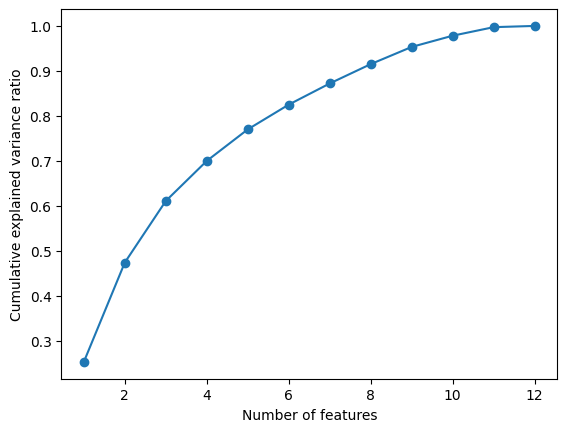

In [6]:
# TODO
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

### 2.3 How many features are required to capture at least 90% of the variance? Drop the other features. (3pt)
You can get this number visually from the cumulative sum of explained_variance_ratio_ plot in the previous step. Alternatively, you can use numpy's *argwhere* function to find the index of the first element in the cumulative sum array that is greater than 0.9.

In [7]:
# TODO
n_components = np.argwhere(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0, 0] + 1
print("Number of features required for 90% of variance:", n_components)
pca_df = PCA(n_components=n_components).fit_transform(scaled_df)

Number of features required for 90% of variance: 8


### 2.4 Import KElbowVisualizer from yellowbrick.cluster library and fit the data to it. Visualize the elbow curve and find the optimal number of clusters. (6pt)

*KElbowVisualizer* is a useful visualization tool for using Elbow method with K-Means clustering algorithm. The official documentation and example can be found here:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


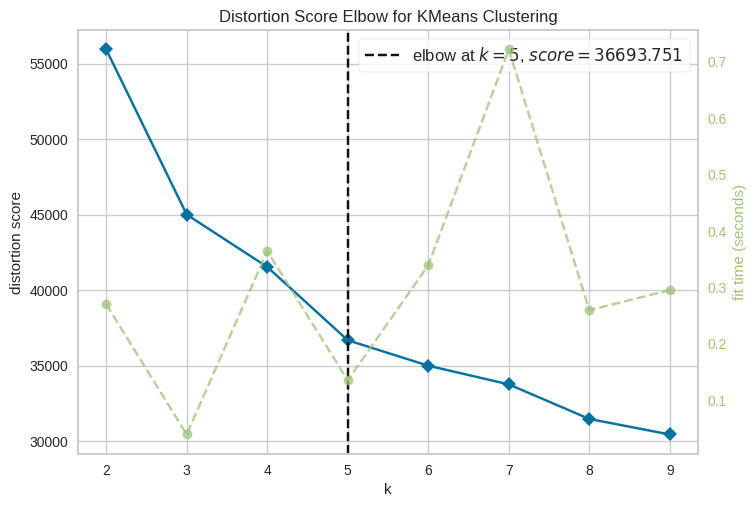

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# TODO
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init = 'auto')
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(pca_df)
visualizer.show()

### 2.5 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data to it. (2pt)

In [9]:
# TODO
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
kmeans.fit(pca_df)

KMeans(n_clusters=5, n_init='auto')

### 2.6 Get the labels from the fitted KMeans object (*labels_* method). Import *silhouette_score* from scikitlearn's metrics library. Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score. (1+1+2+3 =7pts)

In [10]:
# TODO
labels = kmeans.labels_
from sklearn.metrics import silhouette_score

unique_labels, counts = np.unique(labels, return_counts=True)
print("Cluster sizes (percentage):",['{:0.3f}%'.format(100 *x/ len(labels)) for x in counts])
print("Silhouette score:", '{:.3}'.format(silhouette_score(pca_df, labels)))

Cluster sizes (percentage): ['24.981%', '24.888%', '9.466%', '25.550%', '15.115%']
Silhouette score: 0.198


## 3. KMeans Clustering without PCA selection (Total 15 points)

### 3.1 Use KElbowVisualizer to find the optimal number of clusters for the data without PCA selection (ie the data with all the features). Also plot the score (similar to step 2.4) (3pt)

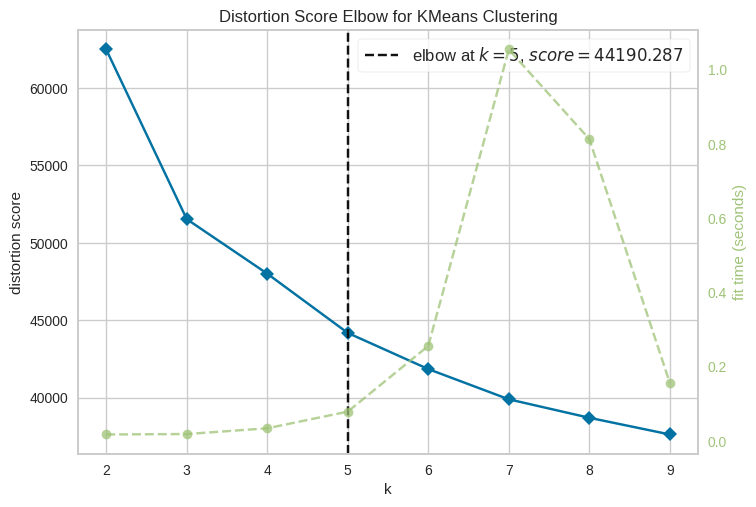

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# TODO
kmeans = KMeans(n_init = 'auto')
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()

### 3.2 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data (without PCA selection) to it. (2pt)

In [12]:
# TODO
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
kmeans.fit(scaled_df)

KMeans(n_clusters=5, n_init='auto')

### 3.3 Retrieve the class labels from this KMeans object (from model's *labels_* method). Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score for the fitted data (without PCA selection) (2+2+3 =7pt)

In [13]:
# TODO
labels = kmeans.labels_
from sklearn.metrics import silhouette_score

unique_labels, counts = np.unique(labels, return_counts=True)
print("Cluster sizes (percentage):",['{:0.3f}%'.format(100 *x/ len(labels)) for x in counts])
print("Silhouette score:", '{:.3}'.format(silhouette_score(pca_df, labels)))

Cluster sizes (percentage): ['24.873%', '15.084%', '24.873%', '25.689%', '9.481%']
Silhouette score: 0.197


### 3.4 Discussion: Did PCA selection help in clustering (did it yield higher silhouette score)? Why or why not? (2-3 sentences) (3pt)

~ # TODO ~
PCA did help in yielding a better silhouette score but only by a marginal amount. The percentage of each cluster size also being different which might not be better persay, it is worth noting that without PCA the clusters are almost 'centered/larger' around the middle/central clusters numerically.

## 4. Hierarchical (agglomerative) clustering (Total 10 points)

### 4.1 Import dendogram and linkage from scipy.cluster.hierarchy library. Use the *linkage* function to fit the data and plot the dendogram. (5pt)
An example is provided in the lecture slide. 

Official Documentation:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

With the *linkage* function, you can use different linkage methods. For this assignment you can use 'ward' method.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage:~:text=method%3D%E2%80%99ward%E2%80%99%20uses,the%20incremental%20algorithm.) 


(This can take a while to complete running)

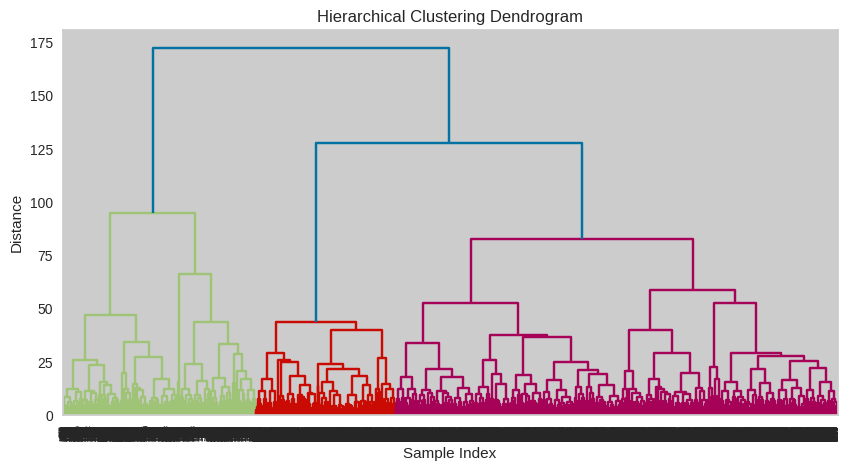

In [14]:
# TODO
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_model = linkage(scaled_df,method='ward')

plt.figure(figsize=(10, 5))    
dendrogram(linkage_model)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### 4.2 Import AgglomerativeClustering from sklearn.cluster library. Use the fit_predict method to fit the data and print the corresponding silhouette score. (5pt)
(Use the above dendogram to find a suitable value for the number of clusters (*k*) in AgglomerativeClustering, OR run the algorithm multiple times with different values of *k* and print the *k* with the highest silhouette score)

In [15]:
# TODO
from sklearn.cluster import AgglomerativeClustering

k_values = range(2, 10)
best_k = None
best_silhouette_score = -1

for k in k_values:
    clustering = AgglomerativeClustering(n_clusters=k)
    labels = clustering.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, labels)
    print("k=",k,", Silhouette score=",silhouette_avg)
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

print("Optimal number of clusters:",best_k)

k= 2 , Silhouette Score= 0.24723028915844972
k= 3 , Silhouette Score= 0.18623511691869202
k= 4 , Silhouette Score= 0.18985749366195473
k= 5 , Silhouette Score= 0.13188839597730456
k= 6 , Silhouette Score= 0.1361154734661192
k= 7 , Silhouette Score= 0.11859058381770132
k= 8 , Silhouette Score= 0.10223994253621846
k= 9 , Silhouette Score= 0.10001509257500898
Optimal number of clusters: 2


## 5. DBSCAN Clustering (Total 20 points)

### 5.1 Import *NearestNeighbors* from sklearn.neighbors library. Use the *fit* method to fit the data with n_neighbors=4. Then use *kneighbors* method to find the distance of the 4th nearest neighbor for each point. Sort and plot the distances. (6pt)
This plots the elbow curve (distance of the 4th nearest neighbor for each point). This is useful for finding the optimal value of epsilon for DBSCAN clustering. 

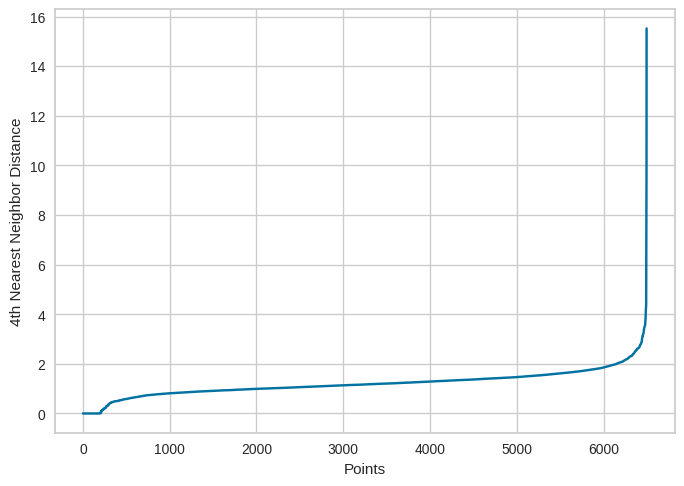

In [16]:
# TODO
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

### 5.2 From the distance plot above, estimate the 'elbow' point. The distance at the elbow point will be used as epsilon in the DBSCAN model. (2pt)
Simply write the distance value in the cell below.

~ # TODO ~
Roughly 2.25

### 5.3 Import DBSCAN from sklearn.cluster library. Instantiate a DBSCAN model (with eps set to the elbow point suggested by above plot, and min_samples=10). (2pt)
(You can experiment with several values of eps and min_samples to find the best combination)

In [25]:
# TODO
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2.25,min_samples=10)

### 5.4 Use the fit method to fit your model to the data. Print (1) the value counts of unique class labels (from model's *labels_* method) in percentage, and (2) print the corresponding silhouette score. (2+2+2=6pt)

In [32]:
# TODO
np.set_printoptions(threshold=np.inf)
dbscan_model.fit(scaled_df)

labels = dbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Cluster sizes (percentage):\n", 100 * np.round(pd.Series(labels).value_counts() / len(labels), 3))

print("Silhouette score:",silhouette_score(scaled_df, labels))

Cluster sizes (percentage):
  0    97.1
-1     2.8
 1     0.2
dtype: float64
Silhouette score: 0.36767192230824813


### 5.5 Use seaborn's pairplot to plot the data with *hue* as the cluster labels obtained from DBSCAN. (2pt)
Set *corner* to *True* for a better visualization.

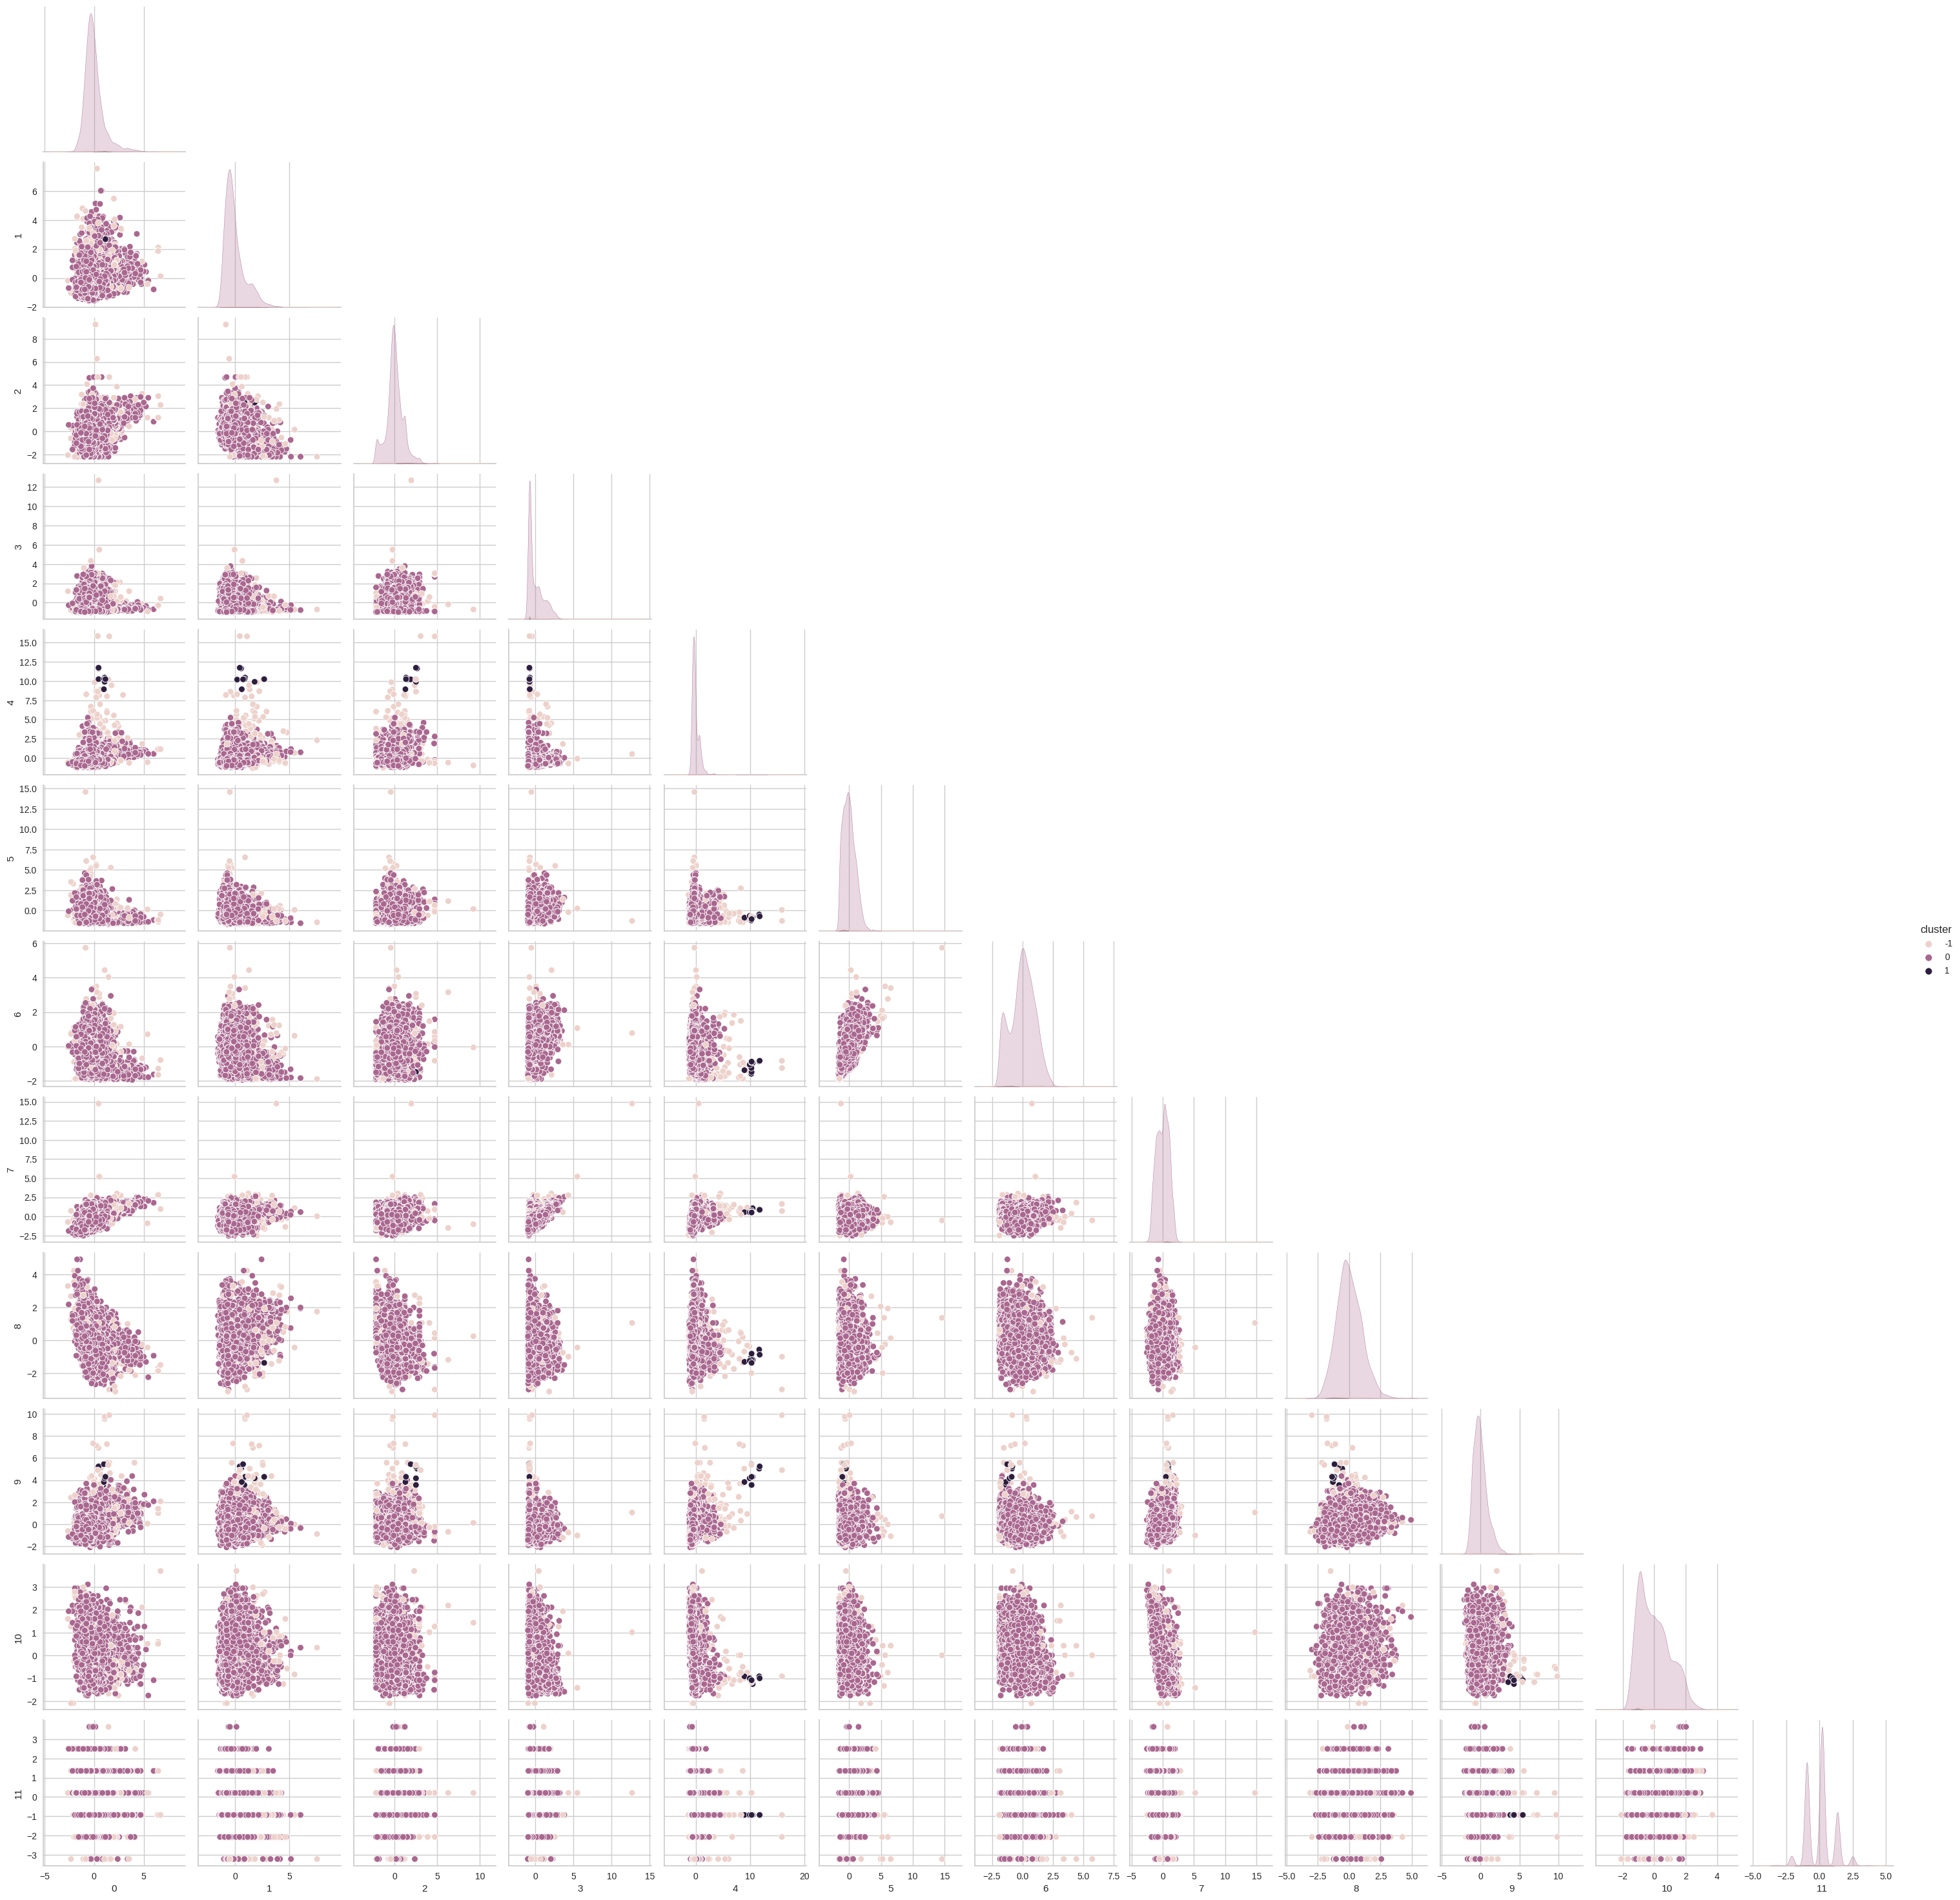

In [45]:
# TODO
new_df = pd.DataFrame(scaled_df)
new_df['cluster'] = labels
sns.pairplot(new_df,hue='cluster',corner=True)

## 6. Discussion: which clustering algorithm performed the best? Why? (2pt)
 (2-3 sentences)

~ # TODO ~

Based off of silhouette score alone, the DBSCAN clustering algorithm performed the best. This could be due to DBSCAN being able to find clusters of irregular shapes whereas the others like Kmeans was better a spherical shapes.